## Random Walk

### Random Walk Model

#### Example 1: Random Walk with Fixed Moves

 - Suppose price of a stock move up by 5 paisa with probability 0.5 or move down by 5 paisa with probability 0.5 every seconds.
 - If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds
 - The model $P_t=P_t−1±M_t$, where $M_t=5 a.s$

In [1]:
options(repr.plot.width=6, repr.plot.height=4)

In [2]:
set.seed(321)
n<-21600
P<-rep(NA,n)
P[1]<-100 ## Current price 100 paisa or Re 1/-

In [3]:
for(sec in 2:n){
  toss<-sample(c("H","T"),1,replace = TRUE,prob = c(0.51,0.49))
  if(toss=="H")P[sec]<-P[sec-1]+5
  if(toss=="T")P[sec]<-P[sec-1]-5
}

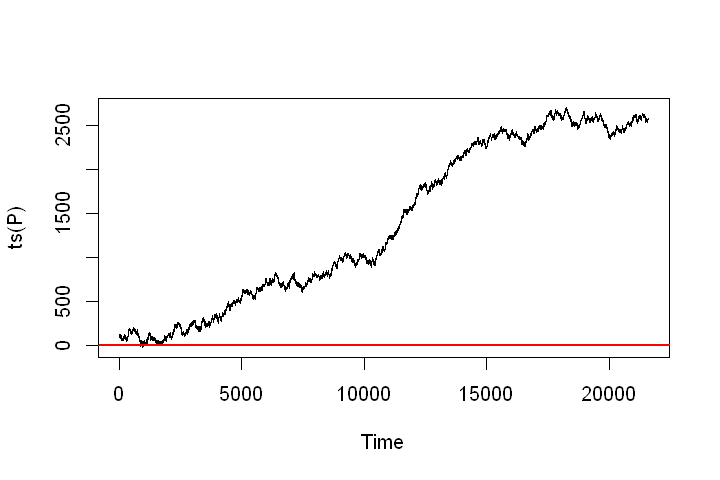

In [4]:
plot(ts(P))
abline(h=0,lwd=2,col="red")

#### Example 2: Random Walk with Random Moves

 - Suppose price of a stock move up or down with probability 0.5 or
 - Size of the movement follow $Poisson(λ=5)$
 - If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds
 - The model:
$$P_t=P_t−1+±M_t$$
where $M_t∼Poisson(λ=5)$

In [5]:
set.seed(321)
n<-21600
P<-M<-rep(NA,n)
P[1]<-100 ## Current price 100 paisa or Re 1/-

In [6]:
for(sec in 2:n){
  toss<-sample(c("H","T"),1,replace = TRUE,prob = c(0.5,0.5))
  M[sec]<-rpois(1,lambda = 5)
  if(toss=="H")P[sec]<-P[sec-1]+ M[sec]
  if(toss=="T")P[sec]<-P[sec-1]- M[sec]
}

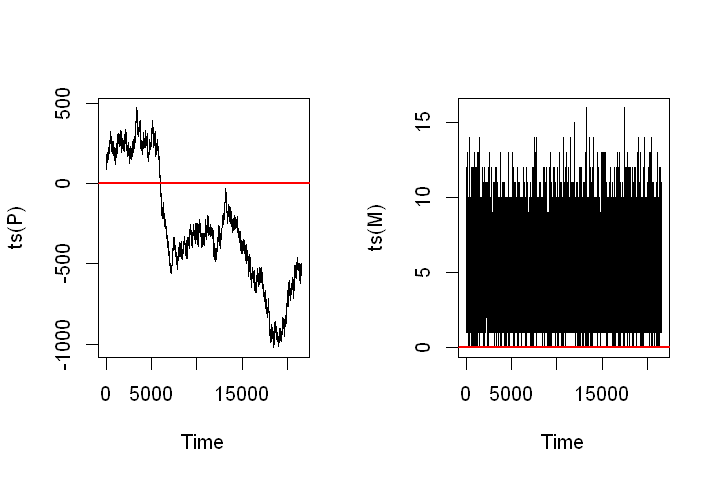

In [7]:
par(mfrow=c(1,2))
plot(ts(P))
abline(h=0,lwd=2,col="red")
plot(ts(M))
abline(h=0,lwd=2,col="red")

#### Example 3: Random Walk with Random Return

 - Simple return of an asset is nothing but movement of the price with respect to previous price.
\begin{eqnarray}
R_t&=&\frac{P_t-P_{t-1}}{P_{t-1}}\\
R_t.P_{t-1}&=&P_t-P_{t-1}\\
P_t&=&P_{t-1}(1+R_t)
\end{eqnarray}

 - Suppose $R_t∼N(\mu=0,\sigma=0.01)$ on every seconds.
 - If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds

In [8]:
set.seed(321)
n<-21600
P<-rep(NA,n)
P[1]<-100 ## Current price 100 paisa or Re 1/-

In [9]:
rt<-rnorm(n,mean=0.0,sd=0.01)
for(sec in 2:n) P[sec]<-P[sec-1]*(1+rt[sec])

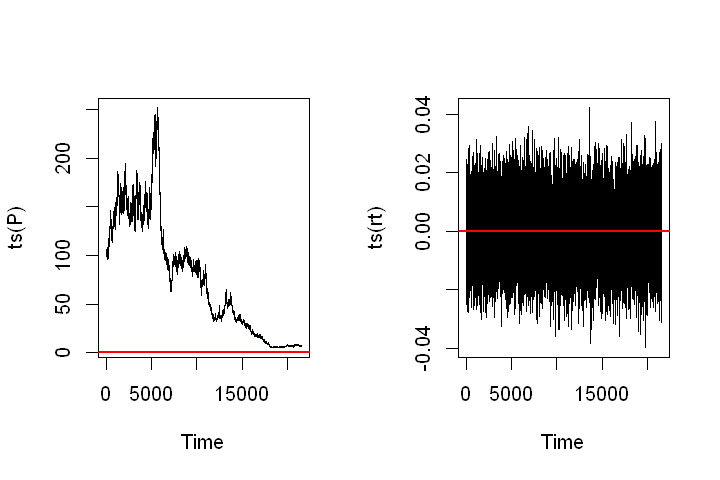

In [10]:
par(mfrow=c(1,2))
plot(ts(P))
abline(h=0,lwd=2,col="red")
plot(ts(rt))
abline(h=0,lwd=2,col="red")

#### Example 4: Random Walk with Random log-Return

 - The log-return of an asset indicates continuous compounding effect of the proce movement;
\begin{eqnarray*}
r_t &=& \log(P_t) - \log(P_{t-1})\\
&=& \log\Big(\frac{P_t}{P_{t-1}}\Big)\\
P_t &=& P_{t-1}e^{r_t}
\end{eqnarray*}
 - Suppose $r_t∼N(\mu=0,\sigma=0.01)$ on every seconds.
 - If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds

In [11]:
set.seed(321)
n<-21600
P<-rep(NA,n)
P[1]<-100 ## Current price 100 paisa or Re 1/-

In [12]:
rt<-rnorm(n,mean=0,sd=0.01)
for(sec in 2:n) P[sec]<-P[sec-1]*exp(rt[sec])

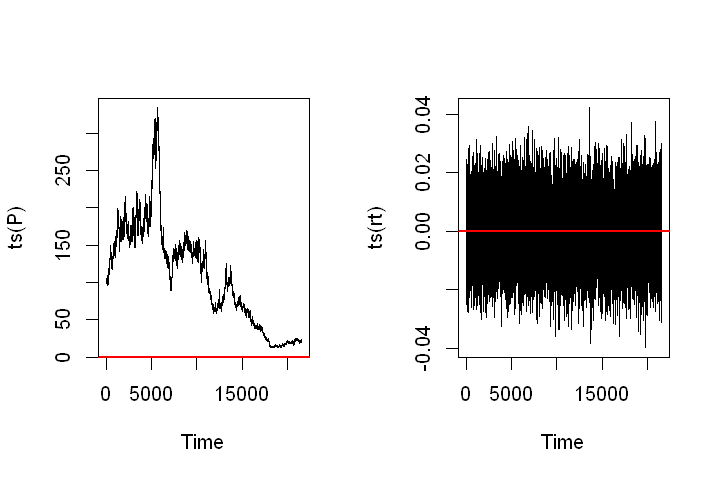

In [13]:
par(mfrow=c(1,2))
plot(ts(P))
abline(h=0,lwd=2,col="red")
plot(ts(rt))
abline(h=0,lwd=2,col="red")

### Random Walk Model


- Suppose $r1,r2,\cdots$ be i.i.d with mean $\mu$ and standard deviation $\sigma$ .
- Let P0 be an arbitrary starting point and $P_t = P_0 + r_1 + r_2+ \cdots + r_t$,  $t\ge1$.

- The process $P_0, P_1, P_2, \cdots$ is known as random walk and $r_1,r_2,\cdots$ are corresponding steps of that random walk.

- The conditional expectation and variance of $P_t$ given $P_0$ is $E(P_t|P_0) = P_0 + \mu t$ and $Var(P_t|P_0) = \sigma^2 t$ .

- The parameter $\mu$ is the drift and set an overall trend of the random walk.

- The parameter $\sigma$  is the volatility and controls how much it fluctuates around $P_0+ \mu t$.

- Since the standard deviation of $P_t$ given $P_0$ is $\sigma \sqrt{t}$ , as $t$ increases the range of variability in the process increases.

- This means at the $t=0$ you know very little about where the random walk will be in the remote future compared to its current spot value

## Stationary Process

- In probability, a stochastic process is known as stationary if the joint probability distribution is independent of time.
- Parameters such as mean, volatility, correlation etc., do not change over time.
- A continuous time random process $P_t$ is stationary, if it has the following restrictions on its mean function,
$E[P_t] = \mu(t) = \mu(t+h) = \mu$  $\forall t,h \in \mathbb{R}$,
and autocovariance function
$Cov_P(t_1,t_2)=E[{P(t_1)−μ(t_1)}{P(t_2)−μ(t_2)}]=Cov_P(t_1−t_2)$.
- The mean function $E(P_t)$ must be constant over time.
- The covariance function depends only on the difference between $t_1$ and $t_2$.


<img src="image.PNG" alt="Alt text that describes the graphic" title="Title text" />

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

#### difference(t) = observation(t) - observation(t-1)

### Simulate from stationary process

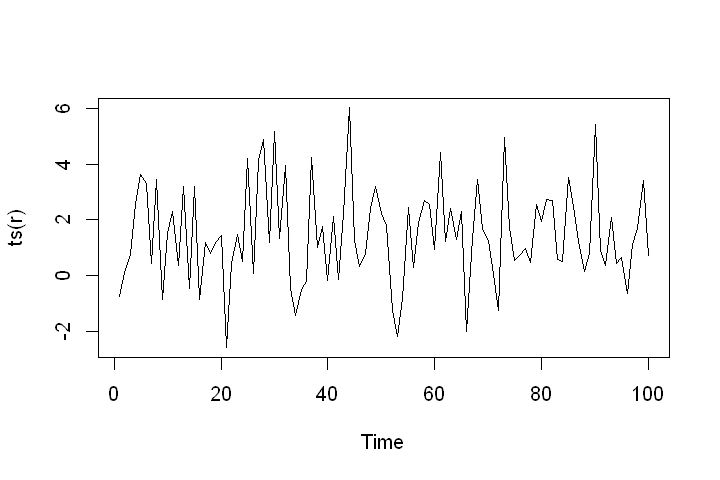

In [14]:
mu<-1
s<-2
n<-100
r<-rnorm(n,mu,s)
plot(ts(r))

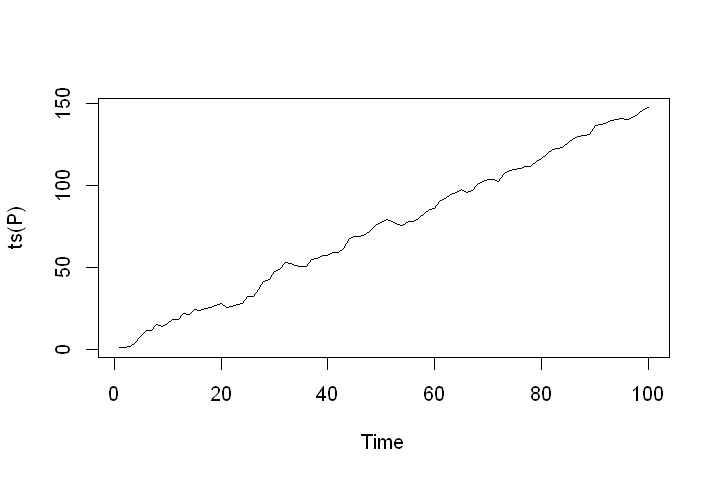

In [15]:
P<-r
P[1]<-1
P<-cumsum(P)
plot(ts(P))

### Dickey-Fuller test for Stationarity in a Time Series
 - The Dickey-Fuller test (1979) compares the null hypothesis
$$H_0:p_t=p_{t−1}+r_t$$
i.e., that the series is a random walk without drift, where $r_t$ is a white noise with mean 0 and variance $\sigma^2$

 - The alternative hypothesis is
$$H_1:p_t=\mu+\phi p_{t−1}+r_t$$
where $\mu$ and $\phi$ are constant with $|\phi|<1$
 - According to $H_1$, the process is stationary AR(1) with mean $\frac{\mu}{ 1 − \phi}$.

In [16]:
library(tseries)
head(EuStockMarkets)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


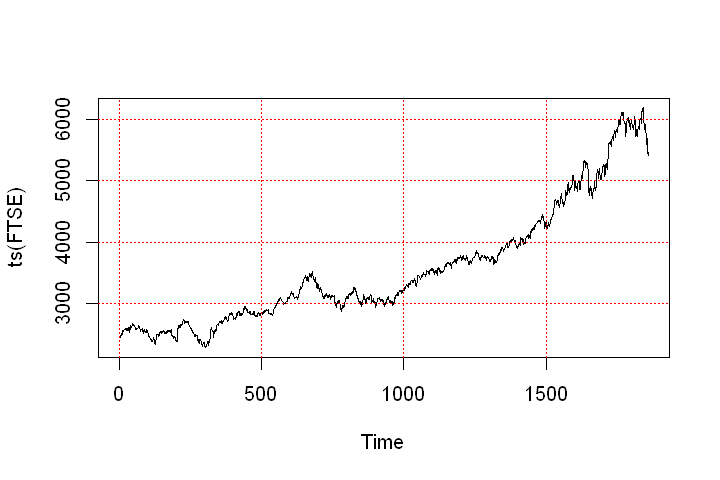

In [17]:
FTSE<-EuStockMarkets[,"FTSE"]
## Plot FTSE
n<-length(FTSE)
plot(ts(FTSE))
grid(col = "red")

#### Compute the log-return of the FTSE

In [18]:
log_return<-diff(log(FTSE))*100
n<-length(log_return)

#### The time-series plot of the log-return 


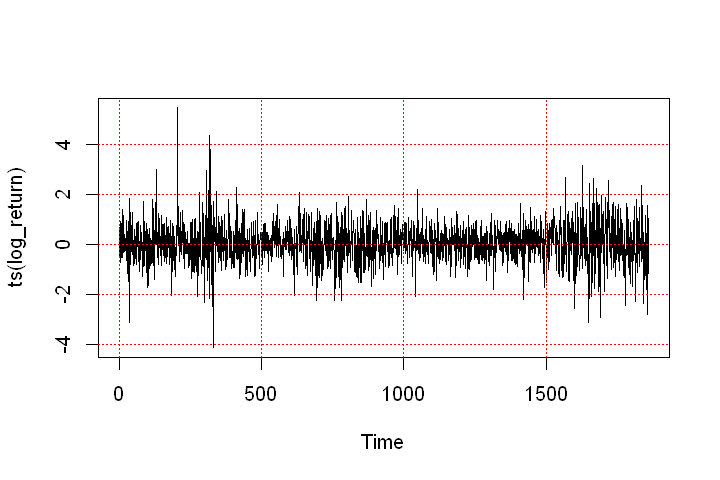

In [19]:
plot(ts(log_return))
grid(col="red")

#### Dickey-Fuller test for unit-root

In [20]:
## Step 1: Check if log-Price is non-stationary
adf.test(log(FTSE))


	Augmented Dickey-Fuller Test

data:  log(FTSE)
Dickey-Fuller = -2.4976, Lag order = 12, p-value = 0.3677
alternative hypothesis: stationary


In [21]:
## Step 2: Check if log-return is non-stationary
adf.test(log_return)

Warning message in adf.test(log_return):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  log_return
Dickey-Fuller = -11.162, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


# Geometric Brownian Motion

For the risk-free assets the price grows at risk-free rate:
$P_T = P_0 e ^{r T}$.

Lets assume that the log-returns follow Geometric Brownian Motion. 

$P_i(i=0,1,\cdots,n)$  : spot prices observed over a consecutive time period of $ \Delta t$ each.

Then the log-return is $r_i  = \log(P_{i+1})−\log(P_i)$.

#### According to Geometric Brownian Motion, $r_i=(\mu − \sigma^2/2)\Delta t + \sigma W_\Delta t$, where $W_\Delta t \sim N(0, \Delta t)$.

Therefore,
$r_i \sim N((\mu − \sigma^2/2) \Delta t, \sigma \sqrt{\Delta t})$.

$ \bar{r} = \sum_{i=1}^{n} r_i$ is the sample mean and variance $s^2= \frac{1}{n-1} \sum_{i=1}^n(r_i−\bar{r})^2$ of returns.

This results in 
### $$\hat{\mu} \approx \frac{\bar{r} + \frac{s^2}{2}}{\Delta t} , \hat{\sigma} \approx \frac{s}{\Delta t}$$.

## Simulation of Geometric Brownian Motion

In [22]:
FTSE<-EuStockMarkets[,"FTSE"]
Asset<-FTSE

In [23]:
## Simulation size
sim.size<-500
n<-length(Asset)

In [24]:
## log-return
rt<-diff(log(Asset))

In [25]:
rbar<-mean(rt)
s<-sd(rt)
delta_t<-1
mu_hat<-rbar+s^2/2

In [26]:
set.seed(321)

In [27]:
## Simulate log-return from Normal distribution
rt.sim<-rnorm(sim.size,mean=(mu_hat-s^2/2),sd=s)

In [28]:
Asset.sim<-rep(NA,sim.size)
Asset.sim[1]<-Asset[n]*exp(rt.sim[1])
for(i in 2:sim.size)Asset.sim[i]<-Asset.sim[i-1]*exp(rt.sim[i])

In [29]:
yl<-min(Asset)*0.85
yu<-max(Asset)*1.9

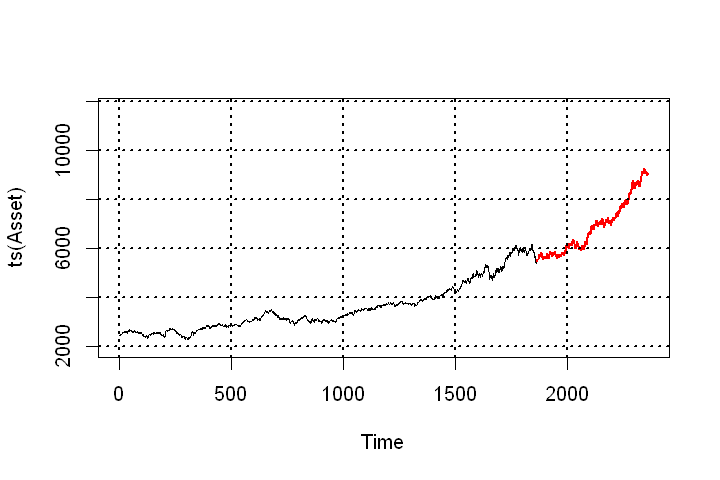

In [31]:
plot(ts(Asset),xlim=c(0,(n+sim.size)),ylim=c(yl,yu))
lines((n+1):(n+sim.size),Asset.sim,col="red",lwd=2)
grid(col="black",lwd=2)